This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [10]:
imdb.load_data?

Object `imdb.load_data` not found.


In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [12]:
len(train_data)

25000

In [13]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [14]:
train_labels[0]

1

In [15]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [16]:
[i*2 for i in range(3)]

[0, 2, 4]

In [17]:
"-".join(["a","B","c"])

'a-B-c'

In [18]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [22]:
reverse_word_index.get(43 - 3, "?")

'just'

In [21]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [23]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [24]:
len(train_data[0])

218

In [25]:
len(train_data[1])

189

In [26]:
train_data[0][2]

22

In [27]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [29]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [30]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### Building your model

**Model definition**

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [32]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [34]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 46ms/step - loss: 0.5195 - accuracy: 0.7935 - val_loss: 0.3987 - val_accuracy: 0.8693
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3196 - accuracy: 0.9012 - val_loss: 0.3231 - val_accuracy: 0.8767
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2340 - accuracy: 0.9261 - val_loss: 0.2951 - val_accuracy: 0.8820
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1871 - accuracy: 0.9395 - val_loss: 0.2733 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1521 - accuracy: 0.9521 - val_loss: 0.2763 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1271 - accuracy: 0.9597 - val_loss: 0.2870 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1034 - accuracy: 0.9703 - val_loss: 0.3142 - val_accuracy: 0.8802
Epoch 8/20
30

In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
history_dict['loss']

[0.5195409655570984,
 0.3196111023426056,
 0.23403602838516235,
 0.18708865344524384,
 0.15209819376468658,
 0.12711571156978607,
 0.1033622995018959,
 0.08545640110969543,
 0.07116396725177765,
 0.05899359658360481,
 0.04837428778409958,
 0.039260510355234146,
 0.030904516577720642,
 0.026553884148597717,
 0.016563113778829575,
 0.015397517941892147,
 0.011371956206858158,
 0.01065910141915083,
 0.00515897898003459,
 0.0059861550107598305]

**Plotting the training and validation loss**

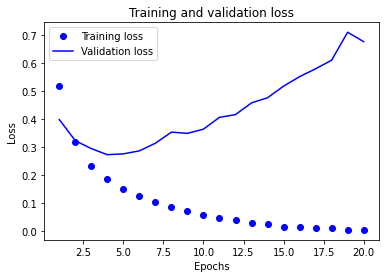

In [37]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

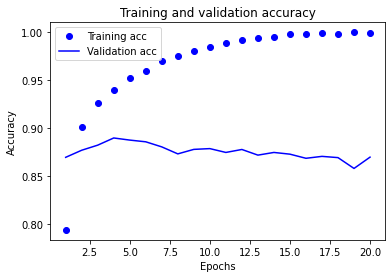

In [38]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [39]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4375 - accuracy: 0.8284
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2542 - accuracy: 0.9104
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1980 - accuracy: 0.9307
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3286 - accuracy: 0.8718


In [40]:
results

[0.3285652697086334, 0.8718000054359436]

### Using a trained model to generate predictions on new data

In [41]:
model.predict(x_test)

array([[0.31782845],
       [0.99978   ],
       [0.9833444 ],
       ...,
       [0.22558215],
       [0.14542568],
       [0.78331476]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [42]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [43]:
len(train_data)

8982

In [44]:
len(test_data)

2246

In [45]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [46]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [47]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [48]:
train_labels[0]

3

### Preparing the data

**Encoding the input data**

In [49]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [50]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [51]:
x_train.shape

(8982, 10000)

**Encoding the labels**

In [52]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [53]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [54]:
y_train[2]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [56]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [57]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [58]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [59]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 2.7701 - accuracy: 0.4853 - val_loss: 1.7863 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.4544 - accuracy: 0.7051 - val_loss: 1.2959 - val_accuracy: 0.7220
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0588 - accuracy: 0.7702 - val_loss: 1.1260 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8318 - accuracy: 0.8217 - val_loss: 1.0146 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6545 - accuracy: 0.8657 - val_loss: 0.9720 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5239 - accuracy: 0.8916 - val_loss: 0.9231 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4244 - accuracy: 0.9097 - val_loss: 0.8994 - val_accuracy: 0.8120
Epoch 8/20
16

**Plotting the training and validation loss**

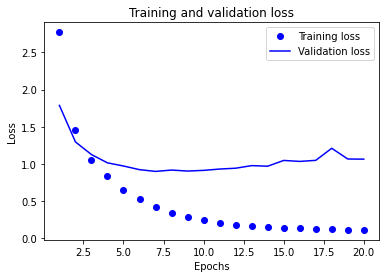

In [60]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

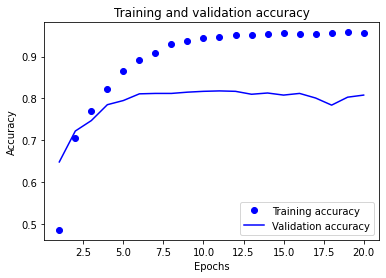

In [61]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [62]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 2.4627 - accuracy: 0.5582
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.3145 - accuracy: 0.7171
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 0.9849 - accuracy: 0.7866
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7725 - accuracy: 0.8367
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6088 - accuracy: 0.8703
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4855 - accuracy: 0.8990
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.3943 - accuracy: 0.9172
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3212 - accuracy: 0.9303
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9493 - accuracy: 0.7934


In [63]:
results

[0.9492931962013245, 0.7934104800224304]

In [64]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18833481745325023

### Generating predictions on new data

In [65]:
predictions = model.predict(x_test)

In [66]:
predictions[0].shape

(46,)

In [67]:
np.sum(predictions[0])

0.99999994

In [68]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [69]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [70]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [71]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [72]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.2841 - accuracy: 0.0765 - val_loss: 2.5928 - val_accuracy: 0.2790
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 1.9609 - accuracy: 0.6002 - val_loss: 1.6149 - val_accuracy: 0.6400
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.4110 - accuracy: 0.6616 - val_loss: 1.4359 - val_accuracy: 0.6570
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2434 - accuracy: 0.6778 - val_loss: 1.3670 - val_accuracy: 0.6630
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.1384 - accuracy: 0.7092 - val_loss: 1.3594 - val_accuracy: 0.6820
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0586 - accuracy: 0.7274 - val_loss: 1.3609 - val_accuracy: 0.6830
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9954 - accuracy: 0.7365 - val_loss: 1.3533 - val_accuracy: 0.6780
Epoch 8/20
63/63 [=

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [73]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [74]:
train_data.shape

(404, 13)

In [75]:
test_data.shape

(102, 13)

In [76]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [77]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [78]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [79]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [80]:
all_scores

[1.849919080734253, 2.425138473510742, 2.556471109390259, 2.3577487468719482]

In [81]:
np.mean(all_scores)

2.2973193526268005

**Saving the validation logs at each fold**

In [82]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [83]:
len(all_mae_histories[0])

500

**Building the history of successive mean K-fold validation scores**

In [84]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [85]:
len(average_mae_history)

500

**Plotting validation scores**

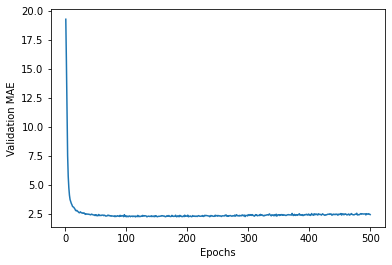

In [86]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

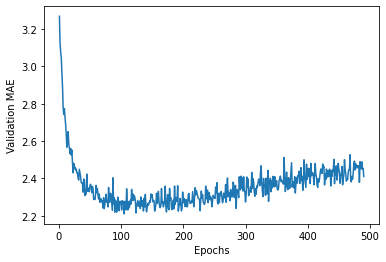

In [87]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [88]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 17.6996 - mae: 2.7619


In [89]:
test_mae_score

2.7618517875671387

### Generating predictions on new data

In [90]:
predictions = model.predict(test_data)
predictions[0]

array([10.10394], dtype=float32)

In [91]:
test_targets[0]

7.2

### Wrapping up

## Summary